In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv("Hitters.csv")

In [2]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.dropna().sum()

AtBat                                                   106158
Hits                                                     28359
HmRun                                                     3056
Runs                                                     14398
RBI                                                      13541
Walks                                                    10813
Years                                                     1923
CAtBat                                                  698934
CHits                                                   189935
CHmRun                                                   18210
CRuns                                                    95001
CRBI                                                     86900
CWalks                                                   68450
League       NANNANANAANNANNANNANAANNNANAANNAAANANANAANNNAA...
Division     WWEEWEWWEEWEEEWWWEWWEEEWWWWEWWWEEEWEWWEWEWWWEE...
PutOuts                                                

In [4]:
df.dropna().sum()

AtBat                                                   106158
Hits                                                     28359
HmRun                                                     3056
Runs                                                     14398
RBI                                                      13541
Walks                                                    10813
Years                                                     1923
CAtBat                                                  698934
CHits                                                   189935
CHmRun                                                   18210
CRuns                                                    95001
CRBI                                                     86900
CWalks                                                   68450
League       NANNANANAANNANNANNANAANNNANAANNAAANANANAANNNAA...
Division     WWEEWEWWEEWEEEWWWEWWEEEWWWWEWWWEEEWEWWEWEWWWEE...
PutOuts                                                

In [5]:
df = df.dropna()
df = pd.get_dummies(df, columns=['League', 'Division', 'NewLeague'], drop_first=True)

In [6]:
y = df['Salary']
X = df.drop('Salary', axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train_scaled,y_train)

In [8]:
knn_model.predict(X_test_scaled)

array([ 670.5   ,  758.    , 1130.    ,  177.    ,  470.    ,  234.    ,
        365.    ,  294.    ,  762.5   ,  552.    ,  515.    ,  555.6666,
        714.    ,  386.    ,  199.5   ,  832.5   ,  736.    ,  168.4   ,
        697.5   ,  294.5   ,  468.3334,  324.4   ,  623.    ,  301.    ,
        577.    ,  206.    ,  870.    ,  258.4   ,  451.    ,  203.4   ,
        229.    ,  131.3334,  415.5   ,  253.5   ,  187.    ,  600.    ,
       1458.1666,  334.5   ,  135.3334,  241.    ,  117.6   ,  245.5   ,
        543.    ,  378.    , 1108.1666,  958.6666,  310.    ,  157.    ,
        244.5   ,  741.    ,  785.    ,  353.    ,  434.5   ])

In [9]:
y_pred = knn_model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))
        

np.float64(361.4966058384181)

In [41]:
# Manual Hyperparameter Tuning
RMSE = []
for k in range(1, 30):
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("RMSE for k =", k, ":", rmse)


RMSE for k = 1 : 440.8705117567948
RMSE for k = 2 : 397.13358398460525
RMSE for k = 3 : 376.84339998511547
RMSE for k = 4 : 365.9537771732989
RMSE for k = 5 : 361.4966058384181
RMSE for k = 6 : 356.91209098547387
RMSE for k = 7 : 359.9766178725041
RMSE for k = 8 : 358.6736943423435
RMSE for k = 9 : 359.3508821048666
RMSE for k = 10 : 358.49764252049084
RMSE for k = 11 : 360.51386403377825
RMSE for k = 12 : 361.59094655788226
RMSE for k = 13 : 357.95911964289513
RMSE for k = 14 : 361.60984905208096
RMSE for k = 15 : 364.426107616838
RMSE for k = 16 : 368.80481975634206
RMSE for k = 17 : 368.65048237053827
RMSE for k = 18 : 368.44049680793614
RMSE for k = 19 : 368.47045567379934
RMSE for k = 20 : 366.5762234853502
RMSE for k = 21 : 364.8773139465015
RMSE for k = 22 : 367.40757036238745
RMSE for k = 23 : 367.75345858078686
RMSE for k = 24 : 365.447639615355
RMSE for k = 25 : 363.99839523603333
RMSE for k = 26 : 363.0480144188229
RMSE for k = 27 : 362.32714271030085
RMSE for k = 28 : 364.5

In [44]:
#Automated Hyperparameter Optimization using Grid Search
from sklearn.model_selection import GridSearchCV
knn_params = {"n_neighbors":np.arange(1,30,1)}
knn = KNeighborsRegressor()

knn_cv_model = GridSearchCV(
    knn,
    knn_params,
    cv=10,
    scoring="neg_mean_squared_error"
).fit(X_train_scaled, y_train)

print("best :", knn_cv_model.best_params_)

best : {'n_neighbors': np.int64(11)}


In [50]:
best_k = knn_cv_model.best_params_["n_neighbors"]
print("Best k (CV, RMSE):", best_k)
print("Best CV RMSE:", (-knn_cv_model.best_score_) ** 0.5)

knn_tuned = KNeighborsRegressor(n_neighbors=best_k).fit(X_train_scaled, y_train)
y_pred = knn_tuned.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE with tuned model:", test_rmse)


Best k (CV, RMSE): 11
Best CV RMSE: 312.7118104109672
Test RMSE with tuned model: 360.51386403377825


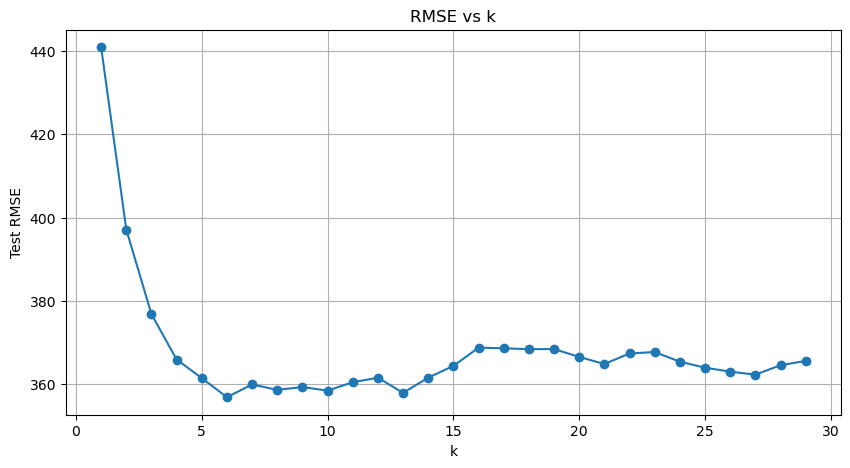

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(1,30), RMSE, marker='o')
plt.xlabel("k")
plt.ylabel("Test RMSE")
plt.title("RMSE vs k")
plt.grid(True)
plt.show()
